In [82]:
import json
import numpy as np
from sklearn.model_selection import train_test_split




In [83]:
with open('test3_embedding.json') as f:
    data = json.load(f)

In [84]:
data_x=[]
data_y=[]
for key in data:
    for embed in data[key]:
        data_x.append(embed)
        data_y.append(key)


In [98]:
tag=list(data.keys())
tag2idx = {t: i for i, t in enumerate(tag)}
idx2tag = {i: t for i, t in enumerate(tag)}
y_t=np.array([tag2idx[i] for i in data_y])



X_train, X_test, y_train, y_test = train_test_split(data_x,data_y,test_size=0.2, random_state=6)
X_test1, X_val, y_test1, y_val = train_test_split(X_test,y_test,test_size=0.5, random_state=6)


In [100]:
from sklearn.neural_network import MLPClassifier
snn_classifier = MLPClassifier(verbose=True,max_iter=20,batch_size='auto',warm_start=True)
snn_classifier.fit(X_train, y_train)


Iteration 1, loss = 1.87387690
Iteration 2, loss = 1.60722894
Iteration 3, loss = 1.54473595
Iteration 4, loss = 1.49922620
Iteration 5, loss = 1.46805862
Iteration 6, loss = 1.44144157
Iteration 7, loss = 1.41954656
Iteration 8, loss = 1.39801260
Iteration 9, loss = 1.38372455
Iteration 10, loss = 1.36612776
Iteration 11, loss = 1.35478100
Iteration 12, loss = 1.34289299
Iteration 13, loss = 1.32934619
Iteration 14, loss = 1.31802391
Iteration 15, loss = 1.30913228
Iteration 16, loss = 1.29796744
Iteration 17, loss = 1.29129057
Iteration 18, loss = 1.28359965
Iteration 19, loss = 1.27487207
Iteration 20, loss = 1.26677301


/home/aaloui/.local/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=20, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=True, warm_start=True)

In [41]:
snn_predictions

array(['other/supernatural', 'person/title', 'person/artist', ...,
       'organization/company', 'other/art', 'person/political_figure'],
      dtype='<U28')

In [101]:
from sklearn.metrics import classification_report
snn_predictions = snn_classifier.predict(X_test)
y_test_t=y_test#[idx2tag[i] for i in y_test]
y_pred_=snn_predictions#[idx2tag[i] for i in snn_predictions]
from sklearn.metrics import f1_score
print('micro f1-score\n')
print(f1_score(y_test_t, y_pred_, average='micro'))
print('macro f1-score\n')
print(f1_score(y_test_t, y_pred_, average='macro'))

print(classification_report(y_test_t,y_pred_ ))

micro f1-score

0.5205755511668212
macro f1-score



/home/aaloui/.local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.3214527795480011


/home/aaloui/.local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/aaloui/.local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


                              precision    recall  f1-score   support

          location/celestial       0.63      0.24      0.35        92
               location/city       0.49      0.48      0.49      1311
            location/country       0.59      0.72      0.65      2121
          location/geography       0.61      0.22      0.32       172
           location/geograpy       0.00      0.00      0.00        10
               location/park       0.25      0.14      0.18         7
          location/structure       0.36      0.28      0.31       581
            location/transit       0.67      0.05      0.09        40
        organization/company       0.56      0.82      0.67      1836
      organization/education       0.78      0.39      0.52       379
     organization/government       0.46      0.12      0.19       244
       organization/military       0.36      0.19      0.25       271
          organization/music       0.48      0.32      0.38       126
organization/politi

/home/aaloui/.local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [102]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test_t,y_pred_))

[[  22   12   42 ...    0    0    2]
 [   4  634  464 ...    4    0   15]
 [   3  346 1535 ...    5    0   17]
 ...
 [   0    7    5 ...  879    9  218]
 [   0    0    3 ...   25   80   84]
 [   0   17   14 ...   70   12 2480]]


In [103]:
from sklearn.svm import SVC
svm_classifier = SVC(decision_function_shape='ovr',verbose=True)  
svm_classifier.fit(X_train, y_train)
# svm_predictions_labels = svm_classifier.predict(X_test)

/home/aaloui/.local/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[LibSVM]

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=True)

In [104]:
from sklearn.metrics import classification_report
svm = svm_classifier.predict(X_test)
y_test_t=y_test#[idx2tag[i] for i in y_test]
y_pred_=svm#[idx2tag[i] for i in xgb_pred]
from sklearn.metrics import f1_score
print('micro f1-score\n')
print(f1_score(y_test_t, y_pred_, average='micro'))
print('macro f1-score\n')
print(f1_score(y_test_t, y_pred_, average='macro'))

print(classification_report(y_test_t,y_pred_ ))

micro f1-score

0.552537181089033
macro f1-score



/home/aaloui/.local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.3210245627013195


/home/aaloui/.local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/aaloui/.local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


                              precision    recall  f1-score   support

          location/celestial       1.00      0.25      0.40        92
               location/city       0.56      0.44      0.49      1311
            location/country       0.58      0.84      0.68      2121
          location/geography       1.00      0.16      0.28       172
           location/geograpy       0.00      0.00      0.00        10
               location/park       0.00      0.00      0.00         7
          location/structure       0.55      0.23      0.32       581
            location/transit       1.00      0.05      0.10        40
        organization/company       0.56      0.88      0.68      1836
      organization/education       0.97      0.39      0.55       379
     organization/government       0.86      0.07      0.14       244
       organization/military       0.75      0.08      0.14       271
          organization/music       1.00      0.21      0.35       126
organization/politi

/home/aaloui/.local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [105]:
from sklearn.svm import SVC
svm3_classifier = SVC(kernel='poly',verbose=True)  
svm3_classifier.fit(X_train, y_train)

/home/aaloui/.local/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[LibSVM]

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='poly', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=True)

In [117]:
from sklearn.externals import joblib
filename = 'svm_classifier.pkl'
joblib.dump(svm3_classifier, filename)


['svm_classifier.pkl']

In [132]:
from sklearn.metrics import classification_report
clf2 = joblib.load(filename)
svm3 =clf2.predict(X_test)
y_test_t=y_test#[idx2tag[i] for i in y_test]
y_pred_=svm3#[idx2tag[i] for i in xgb_pred]
from sklearn.metrics import f1_score
print('micro f1-score\n')
print(f1_score(y_test_t, y_pred_, average='micro'))
print('macro f1-score\n')
print(f1_score(y_test_t, y_pred_, average='macro'))

print(classification_report(y_test_t,y_pred_ ))

In [106]:
from sklearn.metrics import classification_report
svm3 = svm3_classifier.predict(X_test)
y_test_t=y_test#[idx2tag[i] for i in y_test]
y_pred_=svm3#[idx2tag[i] for i in xgb_pred]
from sklearn.metrics import f1_score
print('micro f1-score\n')
print(f1_score(y_test_t, y_pred_, average='micro'))
print('macro f1-score\n')
print(f1_score(y_test_t, y_pred_, average='macro'))

print(classification_report(y_test_t,y_pred_ ))

micro f1-score

0.5750675103784612
macro f1-score



/home/aaloui/.local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.37580757637214796


/home/aaloui/.local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/aaloui/.local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


                              precision    recall  f1-score   support

          location/celestial       0.97      0.30      0.46        92
               location/city       0.56      0.51      0.53      1311
            location/country       0.60      0.83      0.70      2121
          location/geography       1.00      0.19      0.31       172
           location/geograpy       0.00      0.00      0.00        10
               location/park       1.00      0.29      0.44         7
          location/structure       0.57      0.30      0.40       581
            location/transit       1.00      0.07      0.14        40
        organization/company       0.57      0.87      0.69      1836
      organization/education       0.96      0.39      0.56       379
     organization/government       0.79      0.16      0.26       244
       organization/military       0.70      0.18      0.28       271
          organization/music       0.93      0.29      0.45       126
organization/politi

/home/aaloui/.local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [58]:
from xgboost import XGBClassifier
from sklearn.multiclass import OneVsRestClassifier
xgb_classifier = OneVsRestClassifier(XGBClassifier(verbosity=3,max_depth=9))
xgb_classifier.fit(np.array(X_train), y_train)
# xbg_predictions_labels = xgb_classifier.predict(X_test)

[02:27:14] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 92 extra nodes, 0 pruned nodes, max_depth=9
[02:27:30] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 76 extra nodes, 0 pruned nodes, max_depth=9
[02:27:57] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 92 extra nodes, 0 pruned nodes, max_depth=9
[02:28:24] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 94 extra nodes, 0 pruned nodes, max_depth=9
[02:28:51] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 90 extra nodes, 0 pruned nodes, max_depth=9
[02:29:18] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 106 extra nodes, 0 pruned nodes, max_depth=9
[02:29:45] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 104 extra nodes, 0 pruned nodes, max_depth=9
[02:30:12] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 112 extra 

OneVsRestClassifier(estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                            colsample_bylevel=1,
                                            colsample_bynode=1,
                                            colsample_bytree=1, gamma=0,
                                            learning_rate=0.1, max_delta_step=0,
                                            max_depth=9, min_child_weight=1,
                                            missing=None, n_estimators=100,
                                            n_jobs=1, nthread=None,
                                            objective='binary:logistic',
                                            random_state=0, reg_alpha=0,
                                            reg_lambda=1, scale_pos_weight=1,
                                            seed=None, silent=None, subsample=1,
                                            verbosity=3),
                    n_jobs=None)

In [59]:
from sklearn.metrics import classification_report
xgb_pred = xgb_classifier.predict(X_test)
y_test_t=y_test#[idx2tag[i] for i in y_test]
y_pred_=xgb_pred#[idx2tag[i] for i in xgb_pred]
from sklearn.metrics import f1_score
print('micro f1-score\n')
print(f1_score(y_test_t, y_pred_, average='micro'))
print('macro f1-score\n')
print(f1_score(y_test_t, y_pred_, average='macro'))

print(classification_report(y_test_t,y_pred_ ))

micro f1-score

0.5383902301398573
macro f1-score

0.29470015271276856
                              precision    recall  f1-score   support

          location/celestial       1.00      0.15      0.26        92
               location/city       0.54      0.42      0.47      1311
            location/country       0.57      0.84      0.68      2121
          location/geography       0.97      0.20      0.33       172
           location/geograpy       0.00      0.00      0.00        10
               location/park       0.00      0.00      0.00         7
          location/structure       0.48      0.20      0.28       581
            location/transit       1.00      0.03      0.05        40
        organization/company       0.55      0.87      0.68      1836
      organization/education       0.93      0.46      0.62       379
     organization/government       0.62      0.07      0.13       244
       organization/military       0.53      0.06      0.11       271
          organiza

In [18]:
len(set(y_train))

44

In [107]:
#For Conv1D add Channel
import keras
X_train_ = np.array(X_train).reshape(-1,776,1)
X_test_ = np.array(X_test1).reshape(-1,776,1)
X_val_ = np.array(X_val).reshape(-1,776,1)

tag2idx = {t: i for i, t in enumerate(tag)}
idx2tag = {i: t for i, t in enumerate(tag)}
y_train_=np.array([tag2idx[i] for i in y_train])
y_test_=np.array([tag2idx[i] for i in y_test1])
y_val_=np.array([tag2idx[i] for i in y_val])

y_train_ = keras.utils.to_categorical(y_train_, len(set(y_train)))
y_test_ = keras.utils.to_categorical(y_test_, len(set(y_train)))
y_val_ = keras.utils.to_categorical(y_val_, len(set(y_train)))
input_shape = (776,1)


In [133]:
# Define model
from keras import models
from keras import layers
from keras import optimizers
from keras.regularizers import l2



model1 = models.Sequential()
model1.add(layers.Flatten(input_shape=input_shape))
model1.add(layers.Dense(256, activation='relu', input_dim=input_shape, kernel_regularizer=l2(0.01)))
model1.add(layers.Dropout(0.))
model1.add(layers.Dense(44, activation='softmax'))
model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_21 (Flatten)         (None, 776)               0         
_________________________________________________________________
dense_42 (Dense)             (None, 256)               198912    
_________________________________________________________________
dropout_24 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_43 (Dense)             (None, 44)                11308     
Total params: 210,220
Trainable params: 210,220
Non-trainable params: 0
_________________________________________________________________


In [134]:
model.compile(loss=keras.losses.categorical_crossentropy,
             optimizer=optimizers.Adam(),
             metrics=['accuracy'])
history = model.fit(X_train_, y_train_, validation_data=[X_val_, y_val_],
          batch_size=1024, 
          epochs=100,
          verbose=1)

Train on 99241 samples, validate on 12406 samples
Epoch 1/100
99241/99241 [==============================] - 6s 59us/step - loss: 1.4618 - acc: 0.5619 - val_loss: 1.5371 - val_acc: 0.5450
Epoch 2/100
99241/99241 [==============================] - 2s 24us/step - loss: 1.4116 - acc: 0.5758 - val_loss: 1.5549 - val_acc: 0.5398
Epoch 3/100
99241/99241 [==============================] - 2s 24us/step - loss: 1.4133 - acc: 0.5752 - val_loss: 1.5494 - val_acc: 0.5459
Epoch 4/100
99241/99241 [==============================] - 2s 24us/step - loss: 1.4089 - acc: 0.5760 - val_loss: 1.5542 - val_acc: 0.5415
Epoch 5/100
99241/99241 [==============================] - 2s 24us/step - loss: 1.4179 - acc: 0.5728 - val_loss: 1.5561 - val_acc: 0.5423
Epoch 6/100
99241/99241 [==============================] - 2s 24us/step - loss: 1.4076 - acc: 0.5763 - val_loss: 1.5410 - val_acc: 0.5461
Epoch 7/100
99241/99241 [==============================] - 2s 24us/step - loss: 1.4089 - acc: 0.5753 - val_loss: 1.5435 - 

In [135]:

# Generate predictions (probabilities -- the output of the last layer)
# on new data using `predict`
predictions = model.predict(X_test_)
print('predictions shape:', predictions.shape)
from sklearn.metrics import classification_report
y_pred=[np.argmax(predictions[i]) for i in range(len(X_test_))]

y_test_t=y_test1#[idx2tag[i] for i in y_test]
y_pred_=[idx2tag[i] for i in y_pred]
from sklearn.metrics import f1_score
print('micro f1-score\n')
print(f1_score(y_test_t, y_pred_, average='micro'))
print('macro f1-score\n')
print(f1_score(y_test_t, y_pred_, average='macro'))

print(classification_report(y_test_t,y_pred_ ))

predictions shape: (12405, 43)
micro f1-score

0.539459895203547
macro f1-score



/home/aaloui/.local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/aaloui/.local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.3335823962399706
                              precision    recall  f1-score   support

          location/celestial       0.68      0.22      0.34        58
               location/city       0.50      0.45      0.48       643
            location/country       0.58      0.79      0.67      1083
          location/geography       0.44      0.29      0.35        85
           location/geograpy       0.00      0.00      0.00         8
               location/park       0.00      0.00      0.00         3
          location/structure       0.37      0.18      0.24       296
            location/transit       1.00      0.12      0.21        17
        organization/company       0.57      0.84      0.68       912
      organization/education       0.77      0.44      0.56       196
     organization/government       0.61      0.21      0.31       111
       organization/military       0.43      0.18      0.25       128
          organization/music       0.67      0.19      0.29        54


/home/aaloui/.local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/aaloui/.local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [36]:
len(y_train_[1])

43

In [27]:

# Evaluate the model on the test data using `evaluate`
print('\n# Evaluate on validation data')
results = model.evaluate(X_test_, y_test_, batch_size=1024)
# print('test loss, test acc:', results)

# Generate predictions (probabilities -- the output of the last layer)
# on new data using `predict`
predictions = model.predict(X_test_)
print('predictions shape:', predictions.shape)
from sklearn.metrics import classification_report
y_pred=[np.argmax(predictions[i]) for i in range(len(X_test_))]

y_test_t=y_test1#[idx2tag[i] for i in y_test]
y_pred_=[idx2tag[i] for i in y_pred]
from sklearn.metrics import f1_score
print('micro f1-score\n')
print(f1_score(y_test_t, y_pred_, average='micro'))
print('macro f1-score\n')
print(f1_score(y_test_t, y_pred_, average='macro'))

print(classification_report(y_test_t,y_pred_ ))



# Evaluate on validation data
12405/12405 [==============================] - 0s 18us/step
predictions shape: (12405, 43)
micro f1-score

0.4701330108827086
macro f1-score

0.1805485451896785


/home/aaloui/.local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/aaloui/.local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


                              precision    recall  f1-score   support

          location/celestial       0.00      0.00      0.00        36
               location/city       0.46      0.31      0.37       672
            location/country       0.54      0.81      0.65      1144
          location/geography       0.00      0.00      0.00        98
           location/geograpy       0.00      0.00      0.00         3
               location/park       0.00      0.00      0.00         4
          location/structure       0.40      0.01      0.01       304
            location/transit       0.00      0.00      0.00        21
        organization/company       0.50      0.89      0.64       931
      organization/education       1.00      0.30      0.46       179
     organization/government       0.00      0.00      0.00       115
       organization/military       0.00      0.00      0.00       137
          organization/music       0.00      0.00      0.00        64
organization/politi

In [140]:
#Conv1D Model
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, Input
from tensorflow.keras import backend as K
input_tensor = Input(shape=(input_shape))
drop_out_rate=0.3
x = layers.Conv1D(128, 3, activation='relu', strides=1)(input_tensor)
x = layers.MaxPooling1D(2)(x)
x = layers.Dropout(drop_out_rate)(x)
x = layers.Conv1D(64, 3,  activation='relu', strides=1)(x)
x = layers.MaxPooling1D(2)(x)
x = layers.Dropout(drop_out_rate)(x)
x = layers.Conv1D(32, 3, activation='relu', strides=1)(x)
x = layers.MaxPooling1D(2)(x)
x = layers.Dropout(drop_out_rate)(x)
x = layers.Flatten()(x)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dropout(drop_out_rate)(x)
# x = layers.Dense(128, activation='relu')(x)
output_tensor = layers.Dense(len(set(y_train)), activation='softmax')(x)

model = keras.Model(input_tensor, output_tensor)

model.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 776, 1)]          0         
_________________________________________________________________
conv1d_7 (Conv1D)            (None, 774, 128)          512       
_________________________________________________________________
max_pooling1d_7 (MaxPooling1 (None, 387, 128)          0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 387, 128)          0         
_________________________________________________________________
conv1d_8 (Conv1D)            (None, 385, 64)           24640     
_________________________________________________________________
max_pooling1d_8 (MaxPooling1 (None, 192, 64)           0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 192, 64)           0   

In [141]:

model.compile(loss=keras.losses.categorical_crossentropy,
             optimizer=keras.optimizers.Adam(),
             metrics=['accuracy'])    
    
# Train model
history = model.fit(X_train_, y_train_, validation_data=[X_val_, y_val_],
             batch_size=1024, 
          epochs=30,
          verbose=1)

Train on 99241 samples, validate on 12406 samples
Epoch 1/30
99241/99241 [==============================] - 113s 1ms/sample - loss: 2.6147 - acc: 0.2467 - val_loss: 2.0971 - val_acc: 0.3921
Epoch 2/30
99241/99241 [==============================] - 111s 1ms/sample - loss: 2.0521 - acc: 0.3768 - val_loss: 1.9096 - val_acc: 0.4246
Epoch 3/30
99241/99241 [==============================] - 178s 2ms/sample - loss: 1.9350 - acc: 0.4055 - val_loss: 1.8230 - val_acc: 0.4419
Epoch 4/30
99241/99241 [==============================] - 218s 2ms/sample - loss: 1.8729 - acc: 0.4207 - val_loss: 1.7805 - val_acc: 0.4458
Epoch 5/30
99241/99241 [==============================] - 223s 2ms/sample - loss: 1.8367 - acc: 0.4293 - val_loss: 1.7564 - val_acc: 0.4534
Epoch 6/30
99241/99241 [==============================] - 184s 2ms/sample - loss: 1.8023 - acc: 0.4367 - val_loss: 1.7334 - val_acc: 0.4560
Epoch 7/30
99241/99241 [==============================] - 113s 1ms/sample - loss: 1.7801 - acc: 0.4451 - val_l

In [143]:


# Generate predictions (probabilities -- the output of the last layer)
# on new data using `predict`
predictions = model.predict(X_test_)
print('predictions shape:', predictions.shape)
from sklearn.metrics import classification_report
y_pred=[np.argmax(predictions[i]) for i in range(len(X_test_))]

y_test_t=y_test1#[idx2tag[i] for i in y_test]
y_pred_=[idx2tag[i] for i in y_pred]
from sklearn.metrics import f1_score
print('micro f1-score\n')
print(f1_score(y_test_t, y_pred_, average='micro'))
print('macro f1-score\n')
print(f1_score(y_test_t, y_pred_, average='macro'))

print(classification_report(y_test_t,y_pred_ ))


predictions shape: (12405, 43)
micro f1-score

0.4930270052398227
macro f1-score



/home/aaloui/.local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.2838621292829248


/home/aaloui/.local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


                              precision    recall  f1-score   support

          location/celestial       0.90      0.16      0.26        58
               location/city       0.46      0.39      0.42       643
            location/country       0.53      0.77      0.63      1083
          location/geography       1.00      0.18      0.30        85
           location/geograpy       0.00      0.00      0.00         8
               location/park       0.00      0.00      0.00         3
          location/structure       0.52      0.10      0.17       296
            location/transit       1.00      0.06      0.11        17
        organization/company       0.52      0.75      0.62       912
      organization/education       0.89      0.35      0.50       196
     organization/government       0.80      0.11      0.19       111
       organization/military       0.25      0.04      0.07       128
          organization/music       0.78      0.13      0.22        54
organization/politi

/home/aaloui/.local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/aaloui/.local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [111]:
#Conv1D Model
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, Input
from tensorflow.keras import backend as K

input_tensor = Input(shape=(input_shape))
drop_out_rate=0.0
x = layers.Conv1D(8, 11, padding='valid', activation='relu', strides=1)(input_tensor)
x = layers.MaxPooling1D(2)(x)
x = layers.Dropout(drop_out_rate)(x)
x = layers.Conv1D(16, 7, padding='valid', activation='relu', strides=1)(x)
x = layers.MaxPooling1D(2)(x)
x = layers.Dropout(drop_out_rate)(x)
x = layers.Flatten()(x)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dropout(drop_out_rate)(x)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dropout(drop_out_rate)(x)
output_tensor = layers.Dense(len(set(y_train)), activation='softmax')(x)

model = tf.keras.Model(input_tensor, output_tensor)

model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 776, 1)]          0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 766, 8)            96        
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 383, 8)            0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 383, 8)            0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 377, 16)           912       
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 188, 16)           0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 188, 16)           0   

In [112]:
model.compile(loss=keras.losses.categorical_crossentropy,
             optimizer=keras.optimizers.Adam(),
             metrics=['accuracy'])
history = model.fit(X_train_, y_train_, validation_data=[X_val_, y_val_],
          batch_size=1024, 
          epochs=100,
          verbose=1)

Train on 99241 samples, validate on 12406 samples
Epoch 1/100
99241/99241 [==============================] - 22s 218us/sample - loss: 2.5423 - acc: 0.2919 - val_loss: 2.0359 - val_acc: 0.3950
Epoch 2/100
99241/99241 [==============================] - 20s 199us/sample - loss: 1.8879 - acc: 0.4268 - val_loss: 1.8434 - val_acc: 0.4449
Epoch 3/100
99241/99241 [==============================] - 20s 200us/sample - loss: 1.7659 - acc: 0.4562 - val_loss: 1.7812 - val_acc: 0.4523
Epoch 4/100
99241/99241 [==============================] - 20s 203us/sample - loss: 1.6879 - acc: 0.4780 - val_loss: 1.7448 - val_acc: 0.4644
Epoch 5/100
99241/99241 [==============================] - 20s 204us/sample - loss: 1.6411 - acc: 0.4882 - val_loss: 1.7111 - val_acc: 0.4674
Epoch 6/100
99241/99241 [==============================] - 20s 202us/sample - loss: 1.5916 - acc: 0.5036 - val_loss: 1.6989 - val_acc: 0.4760
Epoch 7/100
99241/99241 [==============================] - 20s 202us/sample - loss: 1.5561 - acc: 

In [113]:
data_mean={}

for key in data.keys():
    data_mean[key]=np.mean(data[key],axis=0)

In [114]:
from scipy import spatial
import operator

result={}
pred=[]
for i in range(len(y_test)):
    for key in data_mean.keys():
        result[key]=1-spatial.distance.euclidean(X_test[i],data_mean[key])

    pred.append(max(result.items(), key=operator.itemgetter(1))[0])

In [115]:
from sklearn.metrics import classification_report
y_test_t=y_test#[idx2tag[i] for i in y_test]
y_pred_=pred#[idx2tag[i] for i in xgb_pred]
from sklearn.metrics import f1_score
print('micro f1-score\n')
print(f1_score(y_test_t, y_pred_, average='micro'))
print('macro f1-score\n')
print(f1_score(y_test_t, y_pred_, average='macro'))

print(classification_report(y_test_t,y_pred_ ))

micro f1-score

0.25021159969368423
macro f1-score

0.16899906500334513
                              precision    recall  f1-score   support

          location/celestial       0.10      0.35      0.15        92
               location/city       0.42      0.35      0.38      1311
            location/country       0.59      0.55      0.57      2121
          location/geography       0.47      0.15      0.23       172
           location/geograpy       0.02      0.20      0.03        10
               location/park       0.02      0.43      0.03         7
          location/structure       0.12      0.01      0.02       581
            location/transit       0.02      0.30      0.04        40
        organization/company       0.15      0.00      0.00      1836
      organization/education       0.35      0.48      0.41       379
     organization/government       0.15      0.13      0.14       244
       organization/military       0.16      0.07      0.09       271
          organiz

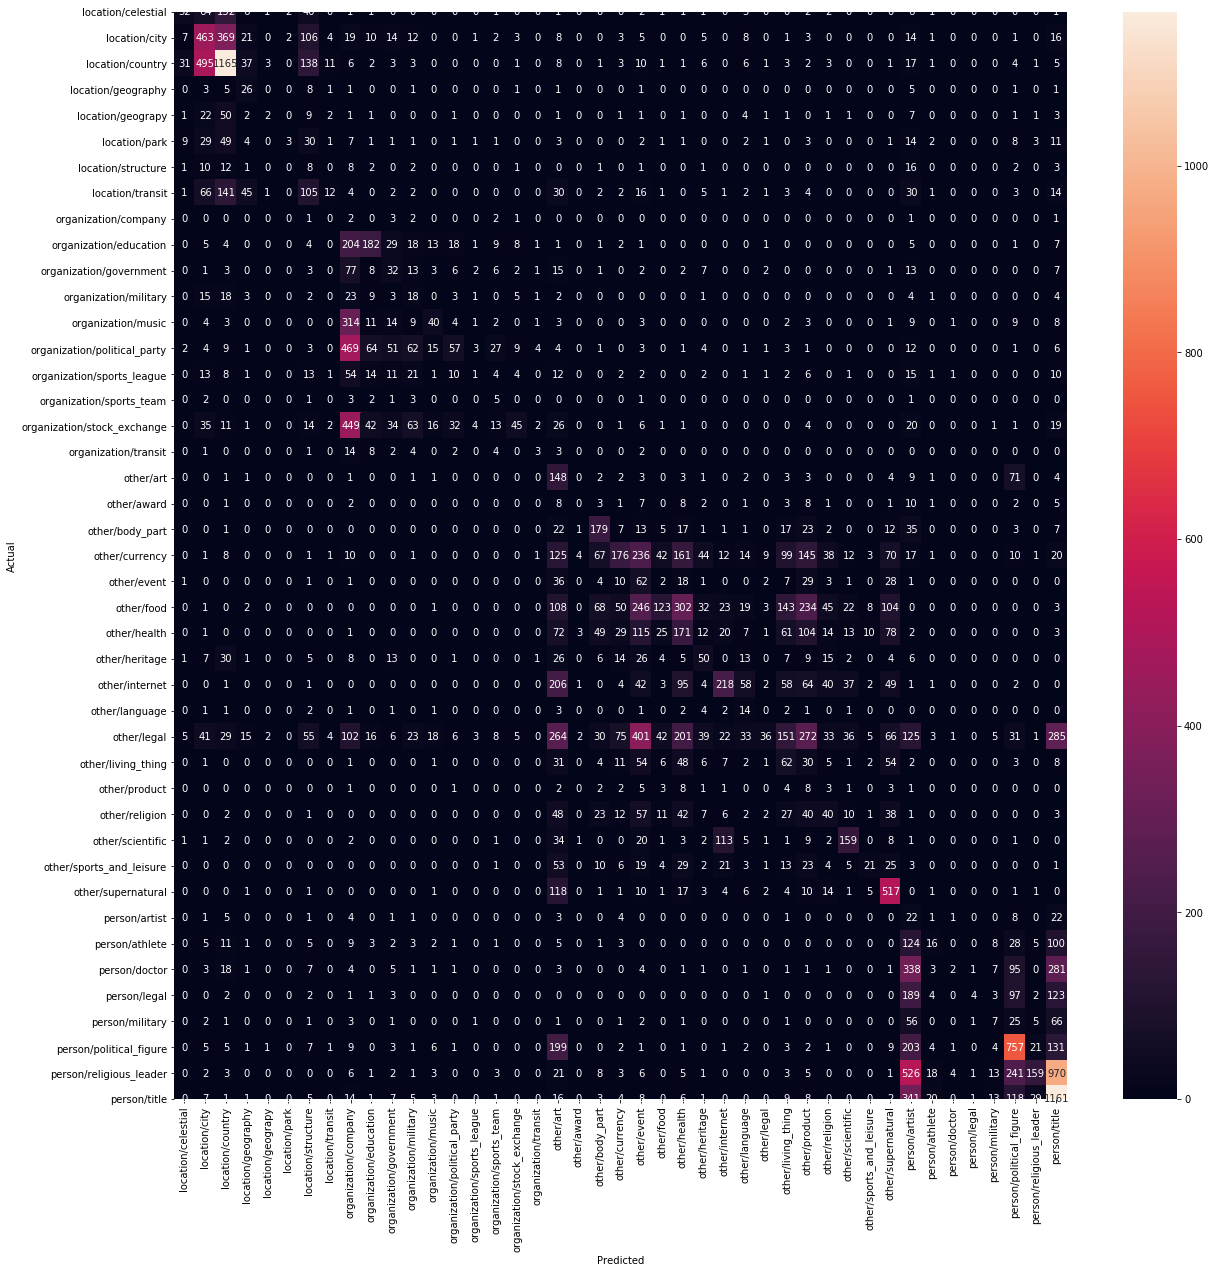

In [116]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=20,20

data = {'y_Predicted': y_test,
        'y_Actual':    y_pred_
        }

df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])

sn.heatmap(confusion_matrix, annot=True,fmt='.8g')